<a href="https://www.kaggle.com/code/avigdorrosensweig/solar-power-research?scriptVersionId=104658020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv


In [2]:
df2w = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')
df2g = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')

In [3]:
df2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [4]:
df2g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [5]:
df2g.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0
67697,2020-06-17 23:45:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0


In [6]:
df2w.drop("PLANT_ID", axis = 1, inplace = True)
df2g.drop("PLANT_ID", axis = 1, inplace = True)


In [7]:
df2w.head()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [8]:
df2g["DATE_TIME"] = pd.to_datetime(df2g["DATE_TIME"], format= '%Y-%m-%d %H:%M:%S')
df2w["DATE_TIME"] = pd.to_datetime(df2w["DATE_TIME"], format= '%Y-%m-%d %H:%M:%S')

In [9]:
df2g_plant_total =df2g.groupby('DATE_TIME').sum().reset_index()
df2g_plant_total['time']= df2g_plant_total['DATE_TIME'].dt.time

df2g_plant_total.head()


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10,00:00:00
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10,00:15:00
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10,00:30:00
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10,00:45:00
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10,01:00:00


<AxesSubplot:xlabel='DATE_TIME', ylabel='KW'>

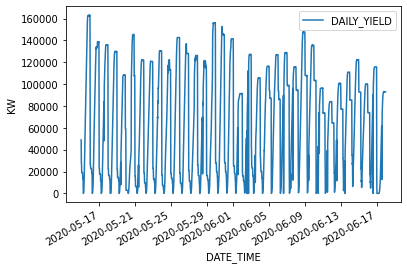

In [10]:
df2g_plant_total.plot(x = "DATE_TIME", y= "DAILY_YIELD", ylabel = "KW")

In [11]:
df2g_plant_total

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10,00:00:00
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10,00:15:00
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10,00:30:00
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10,00:45:00
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10,01:00:00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,1.419408e+10,22:45:00
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,1.419408e+10,23:00:00
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,1.419408e+10,23:15:00
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,1.419408e+10,23:30:00


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='time'>

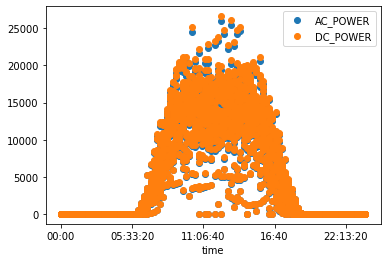

In [12]:
df2g_plant_total.set_index("time").drop("DATE_TIME", 1)
df2g_plant_total[["time","AC_POWER", "DC_POWER"]].plot(x= "time", y = ["AC_POWER", "DC_POWER"], style ="o")

<AxesSubplot:xlabel='time'>

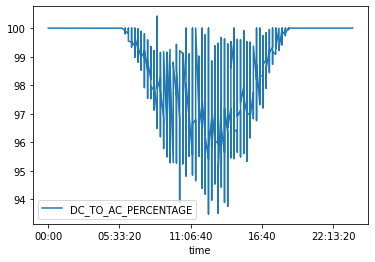

In [13]:
df2g_plant_total["DC_TO_AC_PERCENTAGE"]= 100- ((df2g_plant_total["DC_POWER"] - df2g_plant_total["AC_POWER"])/100)
df2g_plant_total[["time","DC_TO_AC_PERCENTAGE"]].plot(x= "time", y = "DC_TO_AC_PERCENTAGE")

our plant AC/DC inverters seem to be decently efficient

In [14]:
df2g_by_day = df2g.copy()
df2g_by_day["date"]= df2g_by_day["DATE_TIME"].dt.date
df2g_by_day = df2g_by_day.groupby("date").sum()
df2g_by_day

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
date,,,,
2020-05-15,666607.630952,651437.736667,7.997412e+06,1.347430e+12
2020-05-16,566839.840000,554253.460476,7.234658e+06,1.346965e+12
2020-05-17,556236.918205,544393.020916,6.712265e+06,1.357864e+12
2020-05-18,530773.677143,519012.565238,6.259087e+06,1.361871e+12
2020-05-19,443495.847015,433554.722647,5.177354e+06,1.314653e+12
2020-05-20,352374.378810,344661.406190,5.764847e+06,1.146138e+12
2020-05-21,494112.260000,483021.364286,5.674293e+06,1.258768e+12
2020-05-22,498711.327619,487411.941136,5.897264e+06,1.274881e+12
2020-05-23,501823.294762,490450.510476,6.287109e+06,1.258321e+12


<AxesSubplot:xlabel='date'>

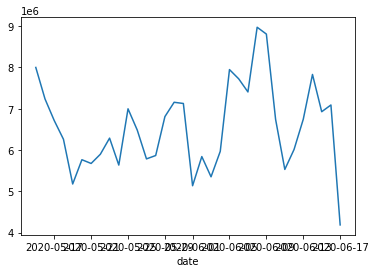

In [15]:
df2g_by_day["DAILY_YIELD"].plot()

So far Solar Power Plant 2 looks like it's working nicely. The amount of AC power generated is very close to the DC power generated, which would indicate that the inverters are working properly. Unlike in Plant 1. 

Now lets see how the DC_POWER generated aligns with irradiation data from our weather sensors

In [16]:
df2w_by_time = df2w.copy()
df2w_by_time["time"] = df2w_by_time["DATE_TIME"].dt.time
df2w_by_time= df2w_by_time.groupby("time").mean()


<AxesSubplot:xlabel='time'>

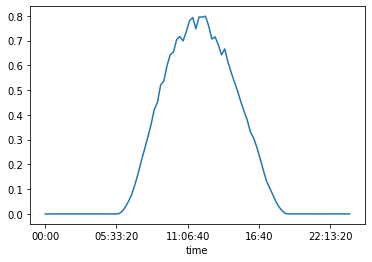

In [17]:
df2w_by_time["IRRADIATION"].plot()

<AxesSubplot:xlabel='time'>

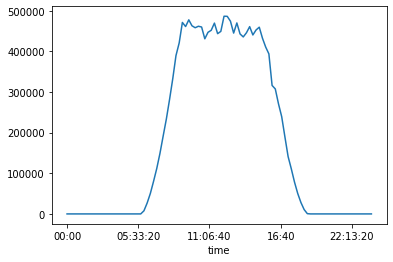

In [18]:
df2g_plant_hour = df2g_plant_total.groupby("time").sum()
df2g_plant_hour["DC_POWER"].plot()

It seems that our ability to produce solar enegy is capped, such that when irradiation goes above .7 we don't see any improvement in our energy production. 

In [19]:
df2g_total = df2g.copy()
df2g_total= df2g_total.groupby("DATE_TIME").sum()

df2w_total= df2w.copy()
df2w_total= df2w_total.groupby("DATE_TIME").sum()
df2w_total

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,
2020-05-15 00:00:00,27.004764,25.060789,0.0
2020-05-15 00:15:00,26.880811,24.421869,0.0
2020-05-15 00:30:00,26.682055,24.427290,0.0
2020-05-15 00:45:00,26.500589,24.420678,0.0
2020-05-15 01:00:00,26.596148,25.088210,0.0
...,...,...,...
2020-06-17 22:45:00,23.511703,22.856201,0.0
2020-06-17 23:00:00,23.482282,22.744190,0.0
2020-06-17 23:15:00,23.354743,22.492245,0.0


<AxesSubplot:xlabel='DATE_TIME'>

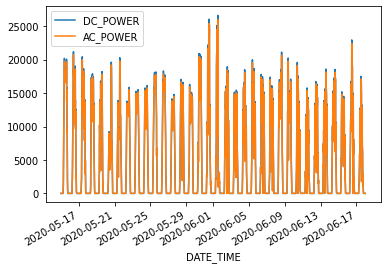

In [20]:
df2g_total[["DC_POWER", "AC_POWER"]].plot()

<AxesSubplot:xlabel='DATE_TIME'>

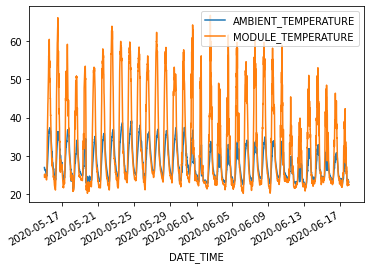

In [21]:
df2w_total[[ "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE"]].plot()